# Reverse-time and Kirchhoff migration

By Adonis JAMAL and Jean-Vincent MARTINI

The goal is to generate synthetic data and plot the images obtained by Reverse-Time migration in diﬀerent two-dimensional conﬁgurations, and to study the resolution and stability properties of the method with respect to measurement noise, and to compare with other methods.

---
## 1) Preliminaries

We assume that the medium has speed of propagation $c_0 = 1$. The homogeneous two-dimensional Green's function $\hat{G}_0(\omega, x, y)$ is solution of $$\Delta_x \hat{G}_0 + \omega^2 \hat{G}_0 = -\delta(x-y), \quad x \in \mathbb{R}^2$$ with the Sommerfeld radiation condition. It is given by $$\hat{G}_0(\omega, x, y) = \frac{i}{4} H_0^{(1)}(\omega |x-y|)$$ where $H_0^{(1)}$ is the Hankel function $$H_0^{(1)}(s) = J_0(s) + i Y_0(s)$$ and $J_0$ is the Bessel function of the first kind of order zero and $Y_0$ is the Bessel function of the second kind of order zero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel1, j0

---
## 2) Time-harmonic localization - full aperture

Consider $N$ transducers on a circular array centered at $0$ with radius $R_0$. Consider a point-like reflector at $x_{ref}$.

Generate the dataset, i.e. the matrix of the time-harmonic amplitudes $\hat{u}_{rs}(\omega)$ recorded by the $r$-th receiver when the $s$-th source emits a time-harmonic signal with unit amplitude and frequency $\omega$. Use a Born approximation for the reflector to generate the data.

Give the forms of the (two-dimensional) RT and KM imaging functional $\mathcal{I}_{RT}(x)$ and $\mathcal{I}_{KM}(x)$, and plot them using the data set.

Compare the focal spot with the theoretical function $J_0^2(\omega |x-x_{ref}|)$ (give a proof of this formula).

Use $\omega = 2\pi$, $R_0 = 100$, $N = 100$, and $x_{ref} = (10, 20)$, and play with the numbers (in particular, move the reflector).

<blockquote>

$\green{\textbf{Answer:}}$ 

Since the transducers are placed on a circular array centered at $\mathbf{0}$ with radius $R_0$, the position of each transducer can be expressed in the form $\bm{x}_t = R_0 (\cos \theta_t, \sin \theta_t)$, where $\theta_t=\frac{2\pi (t-1)}{N}$ for $t=1,2,...,N$.

When a source $s$ emits a time-harmonic signal at frequency $\omega$, the signal recorded at the position $\bm{x}$ can be expressed using the Green's function as:
$$\hat{u}_{s}(\omega, \bm{x}) = \hat{G}_0(\omega, \bm{x}, \bm{x}_s) = \frac{i}{4} H_0^{(1)}(\omega |\bm{x}-\bm{x}_s|).$$

A point-like reflector at $\bm{x}_{ref}$ is modeled with $\delta(\bm{x}-\bm{x}_{ref})$. Using the Born approximation, the filed measured at the receiver $r$ due to the source $s$ can be expressed as:
$$\hat{u}_{rs}(\omega) = \omega^2 \int_{\mathbb{R}^2} \hat{G}_0(\omega, \bm{x}_r, \bm{x}) \delta(\bm{x}-\bm{x}_{\text{ref}}) \hat{G}_0(\omega, \bm{x}, \bm{x}_s) \, d\bm{x} = \omega^2 \hat{G}_0(\omega, \bm{x}_r, \bm{x}_{\text{ref}}) \hat{G}_0(\omega, \bm{x}_{\text{ref}}, \bm{x}_s).$$

Using the explicit expression of the Green's function, we have:
$$\hat{u}_{rs}(\omega) = \omega^2 \left(\frac{i}{4}\right)^2 H_0^{(1)}(\omega |\bm{x}_r - \bm{x}_{\text{ref}}|) H_0^{(1)}(\omega |\bm{x}_{\text{ref}} - \bm{x}_s|) = -\frac{\omega^2}{16} H_0^{(1)}(\omega |\bm{x}_r - \bm{x}_{\text{ref}}|) H_0^{(1)}(\omega |\bm{x}_{\text{ref}} - \bm{x}_s|).$$

Since our transducers are both sources and receivers, we can write the $\hat{u}_{rs}(\omega)$ as a $N \times N$ data matrix where each entry corresponds to the measurement at receiver $r$ due to source $s$. By defining $v_t = H_0^{(1)}(\omega |\bm{x}_t - \bm{x}_{\text{ref}}|)$, for $t=1,2,...,N$, since our indexes $r$ and $s$ are interchangeable, we can express the data matrix as:
$$\hat{U}(\omega) = -\frac{\omega^2}{16} \mathbf{v} \mathbf{v}^T,$$
where $\mathbf{v} = (v_1, v_2, ..., v_N)^T$.

Reverse-Time (RT) migration and Kirchhoff Migration (KM) are two imaging techniques used to reconstruct the location of the reflector from the measured data. The imaging functionals for RT and KM can be defined as follows:
$$\mathcal{I}_{RT}(\bm{x}) = \left|\sum_{r=1}^N \sum_{s=1}^N \overline{\hat{G}_0(\omega, \bm{x}, \bm{x}_r)} \hat{u}_{rs}(\omega) \overline{\hat{G}_0(\omega, \bm{x}_s, \bm{x})} \right|^2,$$
$$\mathcal{I}_{KM}(\bm{x}) = \left|\sum_{r=1}^N \sum_{s=1}^N \hat{G}_0(\omega, \bm{x}, \bm{x}_r) \hat{u}_{rs}(\omega) \hat{G}_0(\omega, \bm{x}_s, \bm{x}) \right|^2.$$

$$
\text{\Large{ATTENTION JE NE SUIS PAS SUR DES FORMULES CI-DESSUS, 
A VERIFIER}}
$$
----
By substituting the expression of $\hat{u}_{rs}(\omega)$ into the imaging functionals, we can express them as a square magnitude of a sum involving the function $H_0^{(1)}$ and its complex conjugate, up to a multiplicative constant. Specifically, we have:
$$\mathcal{I}_{RT}(\bm{x}) \propto \left| \sum_{t=1}^N \overline{H_0^{(1)}(\omega |\bm{x}-\bm{x}_t|)} H_0^{(1)}(\omega |\bm{x}_t - \bm{x}_{\text{ref}}|) \right|^2,$$
$$\mathcal{I}_{KM}(\bm{x}) \propto \left| \sum_{t=1}^N H_0^{(1)}(\omega |\bm{x}-\bm{x}_t|) H_0^{(1)}(\omega |\bm{x}_t - \bm{x}_{\text{ref}}|) \right|^2.$$

Since the only difference between the RT and KM imaging functionals is the complex conjugation of the function $H_0^{(1)}$ in the RT functional, and since both functionals involve the square magnitude of the sum, we immediately see that, in this particular configuration, $\mathcal{I}_{RT}(\bm{x}) = \mathcal{I}_{KM}(\bm{x})$ for all $\bm{x}$.

Next, we will prove that, at the focal spot, the imaging functional behaves like $\mathcal{I}(\bm{x}) \sim J_0^2(\omega |\bm{x}-\bm{x}_{\text{ref}}|)$, where $J_0$ is the Bessel function of the first kind of order zero. 

As the number of transducers $N\to\infty$, uniformly distributed on the circle $\Gamma_{R_0}$ of radius $R_0$, the discrete sum in the imaging functional converges to the following integral:
$$
\mathcal{I}(\bm{x})\propto
\left|
\int_{\Gamma_{R_0}}
H_0^{(1)}\big(\omega|\bm{x}-\bm{y}|\big)
H_0^{(1)}\big(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|\big)
\,d\sigma(\bm{y})
\right|^2,
$$
where $d\sigma$ denotes the arc-length measure on $\Gamma_{R_0}$.

Since $R_0=|\bm{y}|>>1$ is considered to be large in this case, we can treat $\bm{x}$ as bounded in the neighborhood of $\bm{x}_{\mathrm{ref}}$. In particular, we can write $|\bm{x} - \bm{y}| \approx |\bm{x}_{\mathrm{ref}} - \bm{y}|$ for $\bm{y} \in \Gamma_{R_0}$, thus:

$$
\mathcal{I}(\bm{x}) \approx \mathcal{I}(\bm{x}_\mathrm{ref})
\propto
\left|
\int_{\Gamma_{R_0}}
\big(H_0^{(1)}(\omega|x_{\mathrm{ref}}-y|)\big)^2
\,d\sigma(y)
\right|^2.
$$

Using the expression $H_0^{(1)}(s)=J_0(s)+iY_0(s)$, we can expand the square in the integral like this:

$$
\int_{\Gamma_{R_0}}
\big(H_0^{(1)}(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)\big)^2
\,d\sigma(\bm{y})
=
\int_{\Gamma_{R_0}}
\Big[
J_0^2(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
-
Y_0^2(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
\Big]
\,d\sigma(\bm{y})
+
2i
\int_{\Gamma_{R_0}}
J_0(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
Y_0(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
\,d\sigma(\bm{y}).
$$

The first integral on the right-hand side is real-valued, while the second one is purely imaginary. Since we are interested in the square magnitude of the integral, we can write:

$$
\mathcal{I}(\bm{x}) \approx \mathcal{I}(\bm{x}_\mathrm{ref})
\propto
\left|
\int_{\Gamma_{R_0}}
\Big[
J_0^2(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
-
Y_0^2(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
\Big]
\,d\sigma(\bm{y})
\right|^2
+
\left|
2\int_{\Gamma_{R_0}}
J_0(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
Y_0(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|)
\,d\sigma(\bm{y})
\right|^2.
$$

As $R_0 \to \infty$, the terms involving $Y_0$ will decay faster due to the asymptotic behavior of $Y_0(z) \sim \sqrt{\frac{2}{\pi z}} \sin(z - \frac{\pi}{4})$ as $|z| \to \infty$, while $J_0(z) \sim \sqrt{\frac{2}{\pi z}} \cos(z - \frac{\pi}{4})$. Therefore, the dominant contribution to the integral will only come from the term involving $J_0^2$, leading to:

$$\mathcal{I}(\bm{x}) \approx \mathcal{I}(\bm{x}_\mathrm{ref}) \propto \left| \int_{\Gamma_{R_0}} J_0^2(\omega|\bm{x}_{\mathrm{ref}}-\bm{y}|) \, d\sigma(\bm{y}) \right|^2.$$

Since $J_0^2$ is a non-negative function, the integral will be maximized when $\bm{x}$ is close to $\bm{x}_{\mathrm{ref}}$, and it will decay abruptly as $\bm{x}$ moves away from $\bm{x}_{\mathrm{ref}}$. Therefore, the integral can be approximated by evaluating $J_0^2$ at the point on $\Gamma_{R_0}$ that is closest to $\bm{x}_{\mathrm{ref}}$, which gives us:

$$\mathcal{I}(\bm{x}) \propto J_0^2(\omega |\bm{x}-\bm{x}_{\mathrm{ref}}|).$$



<blockquote>

In [7]:
# Parameters
N = 100  # Number of transducers
w = 2 * np.pi  # Frequency
R0 = 100  # Array radius
x_ref = (10, 20)  # Point-like reflector position

theta_t = np.linspace(0, 2 * np.pi, N, endpoint=False)  # Angles for transducers
x_t = np.stack(
    (R0 * np.cos(theta_t), R0 * np.sin(theta_t)), axis=-1
)  # Transducer positions

# Grid parameters for imaging
n = 200
xlim = (-125, 125)
zlim = (-125, 125)
x = np.linspace(xlim[0], xlim[1], n)
z = np.linspace(zlim[0], zlim[1], n)
X, Z = np.meshgrid(x, z)

In [8]:
# Green's function
def G0(x, y, omega=w):
    """Compute the homogeneous Green's function in 2D."""
    dif = np.linalg.norm(x - y)
    return (1j / 4) * hankel1(0, omega * dif)

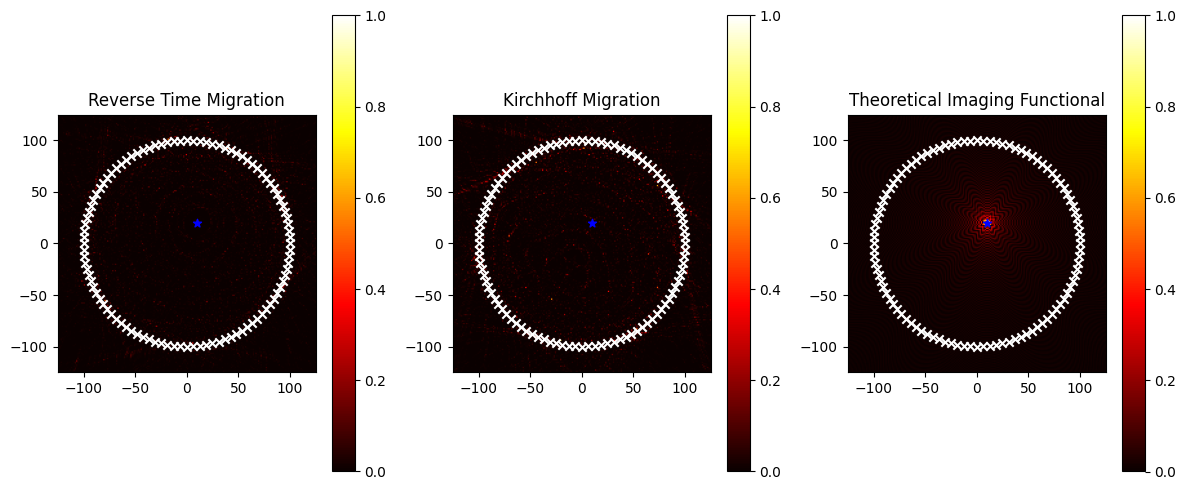

In [9]:
# Generate data matrix using Born approximation
v_t = np.array([G0(x_t[r], x_ref) for r in range(N)])
U = -(w**2 / 16) * np.outer(v_t, v_t)

# Compute imaging functionals
I_RT = np.zeros_like(X, dtype=float)
I_KM = np.zeros_like(X, dtype=float)

for i in range(n):
    for j in range(n):
        X_ij = np.array([X[i, j], Z[i, j]])

        g = np.array(
            [G0(x_t[r], X_ij) for r in range(N)]
        )  # Symmetric in this case, so we can reuse g for both Green's functions
        g = g.ravel()

        # Reverse-Time migration
        sum_RT = np.sum(np.conj(g)[:, None] * U * np.conj(g)[None, :])
        I_RT[i, j] = np.abs(sum_RT) ** 2

        # Kirchhoff Migration
        sum_KM = np.sum(g[:, None] * U * g[None, :])
        I_KM[i, j] = np.abs(sum_KM) ** 2

dist = np.sqrt((X - x_ref[0]) ** 2 + (Z - x_ref[1]) ** 2)
I_TH = j0(w * dist) ** 2

# Normalize for better visualization
I_RT /= I_RT.max()
I_KM /= I_KM.max()
I_TH /= I_TH.max()

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

im0 = axes[0].imshow(
    I_RT, extent=(xlim[0], xlim[1], zlim[0], zlim[1]), origin="lower", cmap="hot"
)

axes[0].set_title("Reverse Time Migration")
axes[0].scatter(x_ref[0], x_ref[1], color="blue", marker="*", label="Reflector")
axes[0].scatter(x_t[:, 0], x_t[:, 1], color="white", marker="x", label="Transducers")
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(
    I_KM, extent=(xlim[0], xlim[1], zlim[0], zlim[1]), origin="lower", cmap="hot"
)

axes[1].set_title("Kirchhoff Migration")
axes[1].scatter(x_ref[0], x_ref[1], color="blue", marker="*", label="Reflector")
axes[1].scatter(x_t[:, 0], x_t[:, 1], color="white", marker="x", label="Transducers")
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(
    I_TH, extent=(xlim[0], xlim[1], zlim[0], zlim[1]), origin="lower", cmap="hot"
)

axes[2].set_title("Theoretical Imaging Functional")
axes[2].scatter(x_ref[0], x_ref[1], color="blue", marker="*", label="Reflector")
axes[2].scatter(x_t[:, 0], x_t[:, 1], color="white", marker="x", label="Transducers")
plt.colorbar(im2, ax=axes[2])

plt.tight_layout()
plt.show()

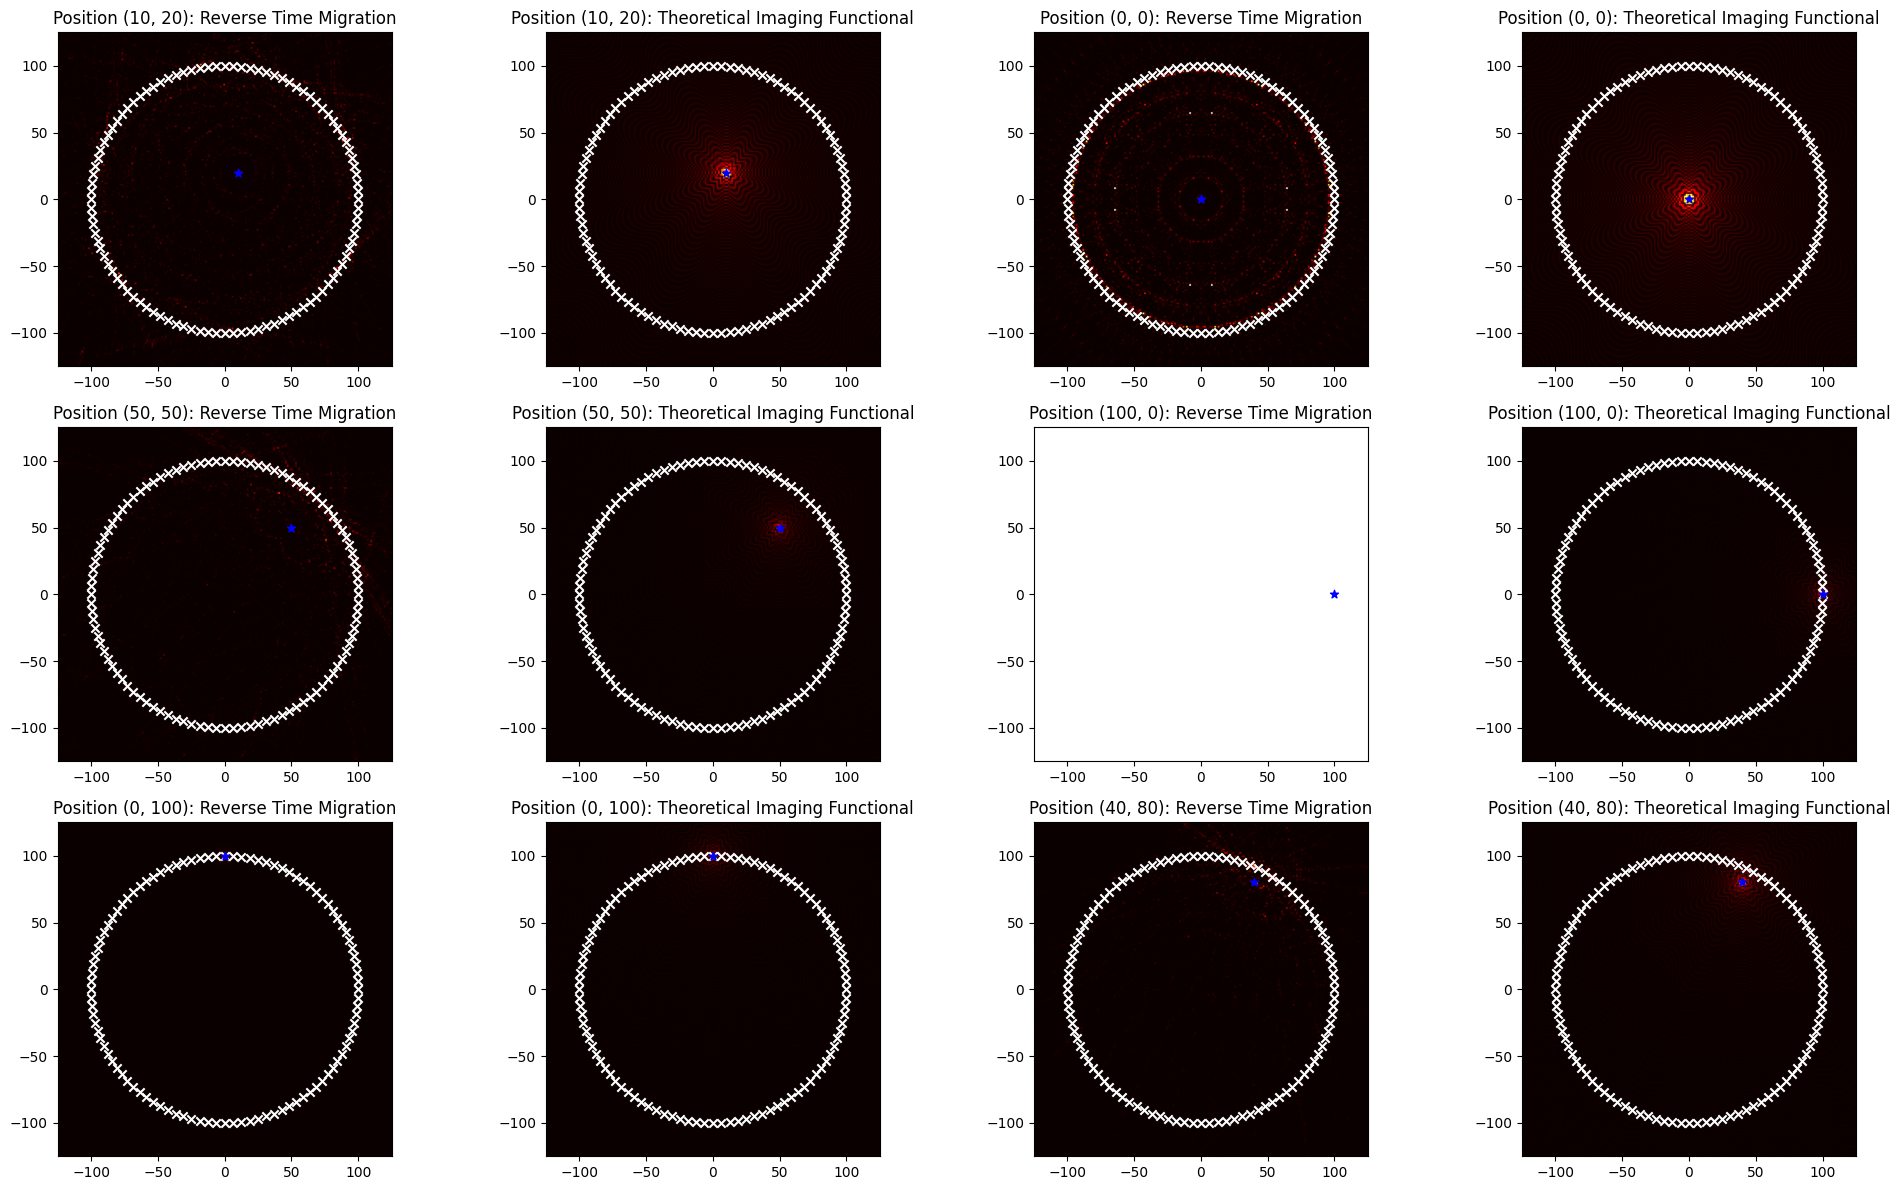

In [10]:
ref_positions = [(10, 20), (0, 0), (50, 50), (100, 0), (0, 100), (40, 80)]
num_rows = len(ref_positions) // 2
num_cols = 4  # 2 plots per position * 2 positions per row

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))

for idx, x_ref in enumerate(ref_positions):
    v_t = np.array([G0(x_t[r], x_ref) for r in range(N)])
    U = -(w**2 / 16) * np.outer(v_t, v_t)

    I_RT = np.zeros_like(X, dtype=float)
    for i in range(n):
        for j in range(n):
            X_ij = np.array([X[i, j], Z[i, j]])

            g = np.array(
                [G0(x_t[r], X_ij) for r in range(N)]
            )  # Symmetric in this case, so we can reuse g for both Green's functions
            g = g.ravel()

            # Reverse-Time migration
            sum_RT = np.sum(np.conj(g)[:, None] * U * np.conj(g)[None, :])
            I_RT[i, j] = np.abs(sum_RT) ** 2

    dist = np.sqrt((X - x_ref[0]) ** 2 + (Z - x_ref[1]) ** 2)
    I_TH = j0(w * dist) ** 2

    # Normalize for better visualization
    I_RT /= I_RT.max()
    I_TH /= I_TH.max()

    # Calculate grid location
    row_idx = idx // 2
    col_start = (idx % 2) * 2  # Starts at 0 for even idx, 2 for odd idx
    ax_rt = axes[row_idx, col_start]
    ax_th = axes[row_idx, col_start + 1]

    ax_rt.set_title(f"Position {x_ref}: Reverse Time Migration")
    ax_rt.imshow(
        I_RT, extent=(xlim[0], xlim[1], zlim[0], zlim[1]), origin="lower", cmap="hot"
    )
    ax_rt.scatter(x_t[:, 0], x_t[:, 1], color="white", marker="x", label="Transducers")
    ax_rt.scatter(x_ref[0], x_ref[1], color="blue", marker="*", label="Reflector")

    ax_th.set_title(f"Position {x_ref}: Theoretical Imaging Functional")
    ax_th.imshow(
        I_TH, extent=(xlim[0], xlim[1], zlim[0], zlim[1]), origin="lower", cmap="hot"
    )
    ax_th.scatter(x_t[:, 0], x_t[:, 1], color="white", marker="x", label="Transducers")
    ax_th.scatter(x_ref[0], x_ref[1], color="blue", marker="*", label="Reflector")

plt.tight_layout()
plt.show()

---
## 3) Time-harmonic localization - partial aperture

We use the convention $x = (x, z)$.

Consider $N$ receivers $(x_r)_{r=1,\dots,N}$ on a regular linear array (along the $x$-direction) centered at $0$ with length $R_0$ (i.e. $x_r = (x_r, 0), x_r = - R_0/2 + R_0 (r - 1) / (N-1)$).

Generate the data set, i.e. the matrix of the time-harmonic amplitudes $\hat{u}_{rs}(\omega)$ recorded by the $r$-th receiver when the $s$-th source emits a time-harmonic signal with unit amplitude and frequency $\omega$. Use a Born approximation for the point-like reflector.

Plot the (two-dimensional) RT and KM imaging functional $\mathcal{I}_{RT}(x)$ and $\mathcal{I}_{KM}(x)$ using the data set. Plot also the MUSIC-type imaging functional $$\mathcal{I}_{MU}(x) = |\langle \hat{g}(\omega, x), v_1 \rangle|^2,$$ where $\hat{g}(\omega, x)$ is the vector of the Green's functions from the array to the search point $x$: $$\hat{g}(\omega, x) = (\hat{G}_0(\omega, x, x_r))_{r=1,\dots,N}$$ and $v_1$ is the first singular vector of the response matrix $\hat{u}$ (MUSIC means MUltiple SIgnal Classification).

Use $\omega = 2\pi$, $R_0 = 100$, $N = 100$, and $x_{ref} = (10, 20)$, and play with the numbers (Reduce $R_0$, move the reflector).

Look at the focal spot in the (cross-range) $x$-direction and compare with the theoretical function $\text{sinc}^2(\pi |x - x_{ref})|/r_c)$, with $r_c = \lambda |x_{ref}| / R_0$ and \lambda = $2\pi / \omega$.

Look at the focal spot in the (range) $z$-direction and compare with the theoretical function $|\int_{0}^{1} \exp(-i \frac{\pi}{2} s^2 \frac{|z-z_{ref})}{r_l}) ds|^2$, with $r_l = 2 \lambda |x_{ref}|^2 / R_0^2$.

In [ ]:
# Parameters
N = 100  # Number of transducers
w = 2 * np.pi  # Frequency
R0 = 100  # Array radius
x_ref = (10, 20)  # Point-like reflector position

x_t = [-R0 / 2 + R0 * (r - 1) / (N - 1) for r in range(N)]  # Transducer x-coordinates
x_t = np.stack((x_t, np.zeros_like(x_t)), axis=-1)  # Transducer positions

# Grid parameters for imaging
n = 200
xlim = (-125, 125)
zlim = (-125, 125)
x = np.linspace(xlim[0], xlim[1], n)
z = np.linspace(zlim[0], zlim[1], n)
X, Z = np.meshgrid(x, z)

In [ ]:
# Generate data matrix using Born approximation
v_t = np.array([G0(x_t[r], x_ref) for r in range(N)])
U = -(w**2 / 16) * np.outer(v_t, v_t)

# Compute imaging functionals
I_RT = np.zeros_like(X, dtype=complex)
I_KM = np.zeros_like(X, dtype=complex)
I_MU = np.zeros_like(X, dtype=complex)

# First singular vector for MUSIC-type functional
_, _, Vh = np.linalg.svd(U)
v1 = Vh.conj().T[:, 0]
v1 = v1.ravel()

---
## 4) Time-dependent localization - partial aperture

Consider $N$ receivers on a linear array (along the $x$-direction) centered at $0$ with length $R_0$.

We now assume that the sources emit a broadband signal with $\hat{f}(\omega) = 1_{[\omega_0 - B, \omega_0 + B]}(\omega)$.

Generate the data set, i.e. the matrices of the time-harmonic amplitudes $\hat{d}_{rs}(\omega)$ recorded by the $r$-th receiver when the $s$-th source emits a time-harmonic signal with unit amplitude and frequency $\omega$, for $\omega$ sampled in $[\omega_0 - B, \omega_0 + B]$.

Plot the (two-dimensional) RT and KM imaging functional $\mathcal{I}_{RT}(x)$ and $\mathcal{I}_{KM}(x)$ using the data set.

Use $\omega_0 = 2\pi$, $B = 0.05\omega_0$, $R_0 = 20$, $N = 40$, and $x_{ref} = (0, 100)$, and play with the numbers (Reduce the bandwidth $B$ for instance).

Look at the focal spot in the (cross-range) $x$-direction and compare with the theoretical function $\text{sinc}^2(\pi |x - x_{ref})|/r_c)$, with $r_c = \lambda_0 |x_{ref}| / R_0$ and $\lambda_0 = 2\pi / \omega_0$.

Look at the focal spot in the (range) $z$-direction and compare with the theoretical function $|\operatorname{sinc}(2B |z-z_{ref}|)|$.

---
## 5) Stability with respect to measurement noise

Consider measurement noise. The recorded signals are $\hat{u}_{rs}(\omega) + W_{rs}^{(1)}(\omega) + i W_{rs}^{(2)}(\omega)$, where the noise terms $W_{rs}^{(1)}(\omega), W_{rs}^{(2)}(\omega)$ are independent and identically distributed Gaussian random variables with mean zero and variance $\sigma^2 /2$.

Revisit the previous questions in the presence of measurement noise and study the stability issue (up to you: establish the statistics of the localization error, the dependence of the standard deviation in the localization error with respect to the number of sensors, with respect to the bandwidth, and so on, compare MUSIC and RT, ...).

---
## References

[1] H. Ammari, J. Garnier, W. Jing, H. Kang, M. Lim, K. Sølna, and H. Wang, Mathematical and Statistical Methods for Multistatic Imaging, Lecture Notes in Mathematics, Vol. 2098, Springer, Berlin, 2013.